<a href="https://colab.research.google.com/github/atoholj/comparing-classifiers/blob/main/prompt_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents 17 marketing campaigns


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder



In [9]:
df = pd.read_csv('bank-additional-full.csv', sep=';')


In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Business Objective

The objective of this task is to help the bank improve the effectiveness of its direct marketing campaigns by predicting whether a client will subscribe to a term deposit. Using historical campaign data, we aim to build a classification model that identifies which clients are most likely to say “yes”.

In [ ]:
## Exploratory Data Analysis (Visualizations)

Before preparing the data for modeling, we explore key numerical and categorical variables to better understand distributions, class imbalance, and potential relationships.


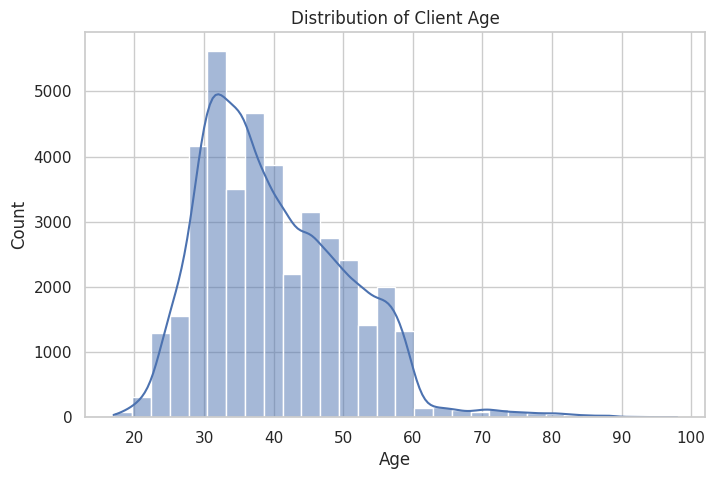

In [42]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Client Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


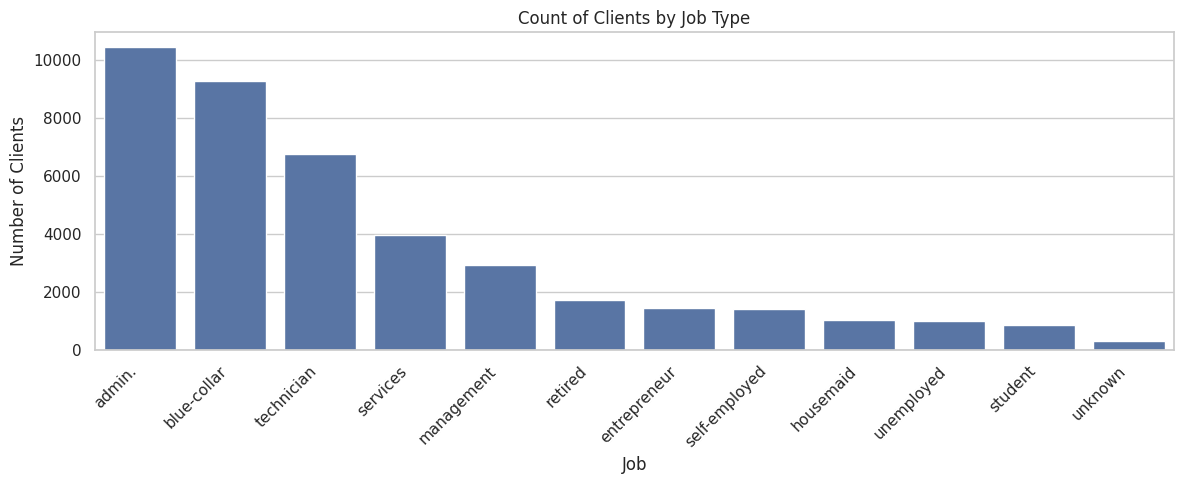

In [43]:
plt.figure(figsize=(12,5))
job_order = df['job'].value_counts().index

sns.countplot(data=df, x='job', order=job_order)
plt.xticks(rotation=45, ha='right')
plt.title("Count of Clients by Job Type")
plt.xlabel("Job")
plt.ylabel("Number of Clients")
plt.tight_layout()
plt.show()


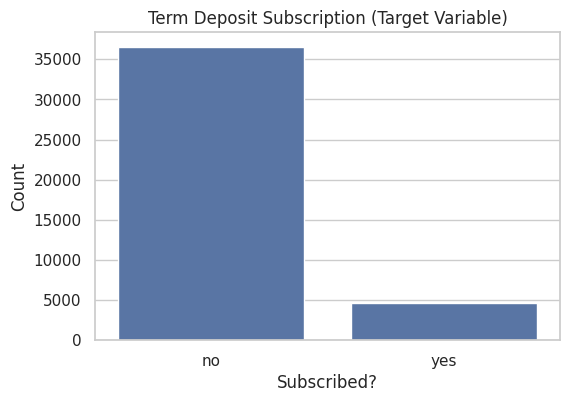

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='y')
plt.title("Term Deposit Subscription (Target Variable)")
plt.xlabel("Subscribed?")
plt.ylabel("Count")
plt.show()


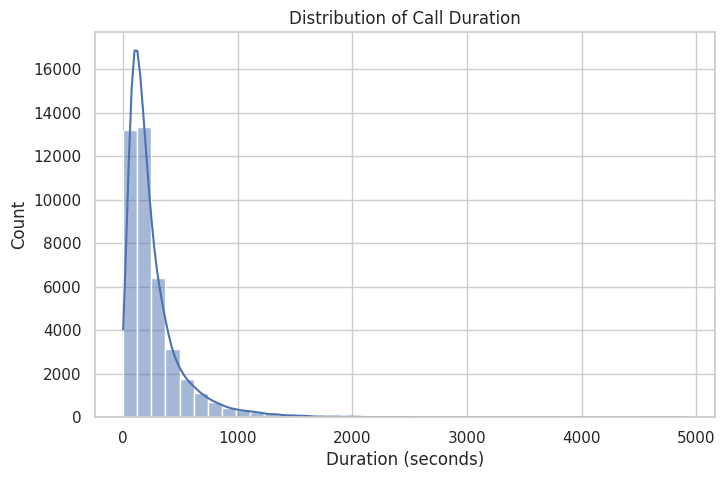

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df['duration'], bins=40, kde=True)
plt.title("Distribution of Call Duration")
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.show()


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [13]:
XX = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]
X = XX.drop(['y'], axis=1)
y = XX.y

In [14]:
le = LabelEncoder()

In [15]:
X.job = le.fit_transform(X.job)
X.marital = le.fit_transform(X.marital)
X.education = le.fit_transform(X.education)
X.default = le.fit_transform(X.default)
X.housing = le.fit_transform(X.housing)
X.loan = le.fit_transform(X.loan)

In [16]:
X

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0
41184,46,1,1,5,0,0,0
41185,56,5,1,6,0,2,0
41186,44,9,1,5,0,0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [20]:
y_df = pd.DataFrame(y).value_counts(normalize=True)

In [21]:
pd.DataFrame(y_df)

,proportion
y,
no,0.887346
yes,0.112654


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [24]:
import time
from sklearn.linear_model import LogisticRegression

start = time.time()
logreg = LogisticRegression(random_state=42, class_weight='balanced').fit(X_train, y_train)
stop = time.time()

logreg_train_time = stop - start
print(f"Training time: {logreg_train_time}s")


Training time: 0.8006672859191895s


### Problem 9: Score the Model

What is the accuracy of your model?

In [26]:
logreg_train_acc = (logreg.score(X_train, y_train))
logreg_test_acc = (logreg.score(X_test, y_test))

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [27]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
stop = time.time()
knn_train_time = stop - start
print(f"Training time: {knn_train_time}s")

Training time: 0.09354925155639648s


In [ ]:
knn_train_acc = (knn.score(X_train, y_train))
knn_test_acc = (knn.score(X_test, y_test))

In [28]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
dtree = DecisionTreeClassifier().fit(X_train, y_train)
stop = time.time()
dtree_train_time = stop - start
print(f"Training time: {dtree_train_time}s")

Training time: 0.42377543449401855s


In [29]:
dtree_train_acc = (dtree.score(X_train, y_train))
dtree_test_acc = (dtree.score(X_test, y_test))

In [30]:
from sklearn.svm import SVC
start = time.time()
svc = SVC().fit(X_train, y_train)
stop = time.time()
svc_train_time = stop - start
print(f"Training time: {svc_train_time}s")

Training time: 21.6064555644989s


In [31]:
svc_train_acc = (svc.score(X_train, y_train))
svc_test_acc = (svc.score(X_test, y_test))

In [32]:
val_df = pd.DataFrame(columns = ['Model','Train Time','Train Accuracy','Test Accuracy'])

In [36]:
from sklearn.neighbors import KNeighborsClassifier
import time

start = time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
stop = time.time()

knn_train_time = stop - start
knn_train_acc = knn.score(X_train, y_train)
knn_test_acc = knn.score(X_test, y_test)

print("KNN Train Time:", knn_train_time)
print("KNN Train Accuracy:", knn_train_acc)
print("KNN Test Accuracy:", knn_test_acc)



KNN Train Time: 0.23526263236999512
KNN Train Accuracy: 0.8899619628260811
KNN Test Accuracy: 0.8766690944403982


In [37]:
val_df = pd.DataFrame(columns = ['Model','Train Time','Train Accuracy','Test Accuracy'])

val_df.loc[len(val_df.index)] = ['Logistic Regression',  logreg_train_time,  logreg_train_acc,  logreg_test_acc]
val_df.loc[len(val_df.index)] = ['KNeighborsClassifier', knn_train_time,     knn_train_acc,     knn_test_acc]
val_df.loc[len(val_df.index)] = ['DecisionTree Classifier', dtree_train_time, dtree_train_acc, dtree_test_acc]
val_df.loc[len(val_df.index)] = ['SVC', svc_train_time, svc_train_acc, svc_test_acc]  # if you've trained SVC too

val_df = val_df.reset_index(drop=True)
val_df


,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.800667,0.504923,0.521486
1,KNeighborsClassifier,0.235263,0.889962,0.876669
2,DecisionTree Classifier,0.423775,0.914781,0.865987
3,SVC,21.606456,0.887291,0.887837


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [38]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Best KNN Params:", grid_knn.best_params_)
print("Best KNN Train Accuracy:", grid_knn.best_estimator_.score(X_train, y_train))
print("Best KNN Test Accuracy:", grid_knn.best_estimator_.score(X_test, y_test))


Best KNN Params: {'n_neighbors': 11, 'weights': 'uniform'}
Best KNN Train Accuracy: 0.8895033586015269
Best KNN Test Accuracy: 0.8851663025006069


In [39]:
from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {
    'max_depth': [3, 5, 7, 9, 12, None],
    'min_samples_split': [2, 5, 10]
}

dtree = DecisionTreeClassifier(random_state=42)

grid_tree = GridSearchCV(dtree, param_grid_tree, cv=3, scoring='accuracy', n_jobs=-1)
grid_tree.fit(X_train, y_train)

print("Best Tree Params:", grid_tree.best_params_)
print("Best Tree Train Accuracy:", grid_tree.best_estimator_.score(X_train, y_train))
print("Best Tree Test Accuracy:", grid_tree.best_estimator_.score(X_test, y_test))


Best Tree Params: {'max_depth': 3, 'min_samples_split': 2}
Best Tree Train Accuracy: 0.8876149882651272
Best Tree Test Accuracy: 0.8880796309783928


In [40]:
from sklearn.metrics import f1_score

logreg_f1 = f1_score(y_test, logreg.predict(X_test), pos_label="yes")
knn_f1    = f1_score(y_test, grid_knn.best_estimator_.predict(X_test), pos_label="yes")
tree_f1   = f1_score(y_test, grid_tree.best_estimator_.predict(X_test), pos_label="yes")

print("LogReg F1:", logreg_f1)
print("KNN Best F1:", knn_f1)
print("Decision Tree Best F1:", tree_f1)


LogReg F1: 0.2542565266742338
KNN Best F1: 0.05964214711729622
Decision Tree Best F1: 0.004319654427645789


##### Questions